In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('ultimate_data_challenge.json')
logins = pd.read_json('logins.json')

In [3]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [4]:
logins.head(40)
logins.describe()

<ipython-input-4-b0a94f70f118>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logins.describe()


login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

In [5]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
sorted_logins = logins.sort_values(by='login_time', ascending = True)

In [8]:
sorted_logins.set_index(sorted_logins.login_time, inplace=True)
sorted_logins['event'] = 1
sorted_logins['weekday'] = sorted_logins['login_time'].apply(lambda stamp : stamp.isoweekday())
#sorted_logins.drop(columns=['login_time'])

In [9]:
sorted_logins.head()

login_time  event  weekday
login_time                                             
1970-01-01 20:12:16 1970-01-01 20:12:16      1        4
1970-01-01 20:13:18 1970-01-01 20:13:18      1        4
1970-01-01 20:16:10 1970-01-01 20:16:10      1        4
1970-01-01 20:16:36 1970-01-01 20:16:36      1        4
1970-01-01 20:16:37 1970-01-01 20:16:37      1        4

In [10]:
grouped_logins = sorted_logins.resample('15T').sum()

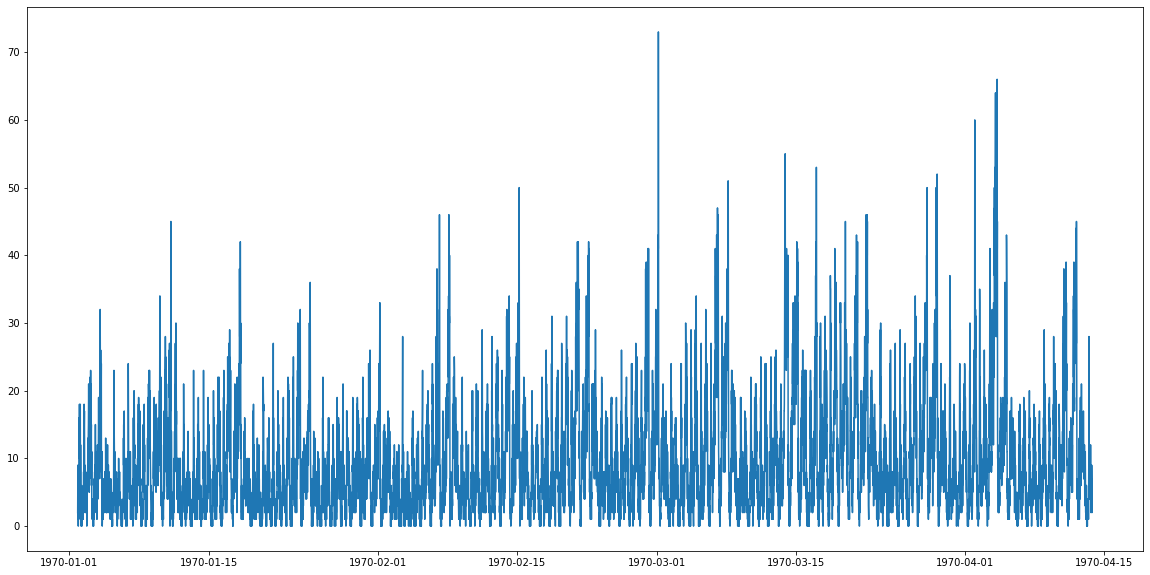

In [11]:
plt.figure(figsize=(20,10))
plt.plot(grouped_logins.event)

In [12]:
grouped_logins.head()

event  weekday
login_time                         
1970-01-01 20:00:00      2        8
1970-01-01 20:15:00      6       24
1970-01-01 20:30:00      9       36
1970-01-01 20:45:00      7       28
1970-01-01 21:00:00      1        4

In [13]:
a = grouped_logins['1970-01-15']

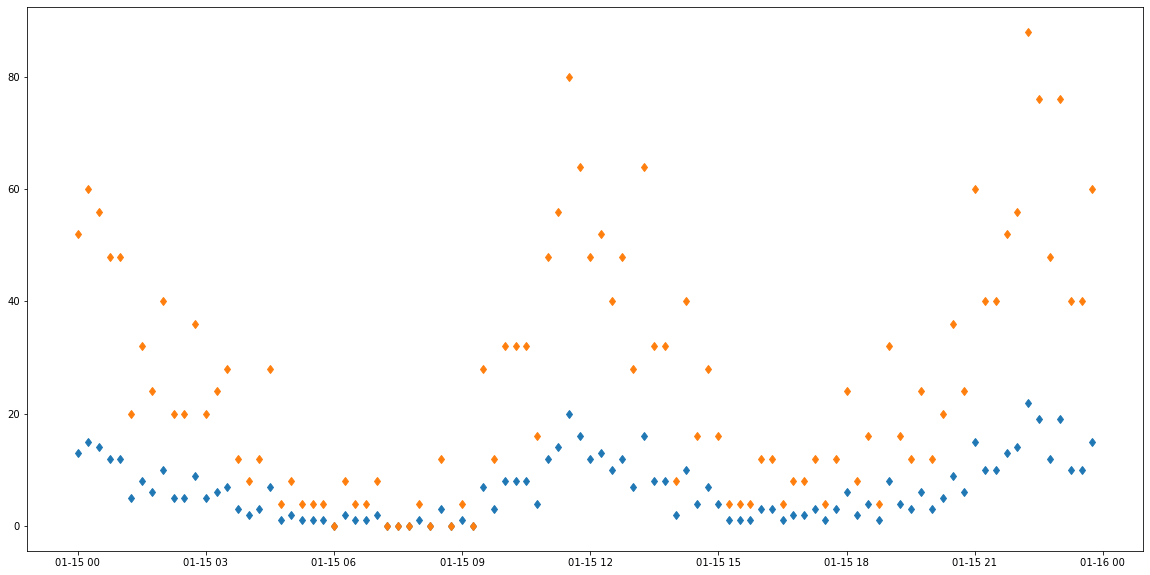

In [14]:
plt.figure(figsize=(20,10))
plt.plot(a, linestyle='', marker='d')

In [15]:
logins.describe()

<ipython-input-15-f0b670fd4367>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logins.describe()


login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

In [18]:
grouped_logins.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   event    9788 non-null   int64
 1   weekday  9788 non-null   int64
dtypes: int64(2)
memory usage: 229.4 KB


In [19]:
sorted_logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:12:16 to 1970-04-13 18:57:38
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   event       93142 non-null  int64         
 2   weekday     93142 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


In [60]:
weekdays = sorted_logins.loc[sorted_logins.weekday.isin([1,2,3,4,5])]
weekdays_grouped = weekdays.resample('15T').sum()
weekday = weekdays_grouped['1970-01-10']

In [61]:
weekends = sorted_logins.loc[sorted_logins.weekday.isin([6,7])]
weekends_grouped = weekends.resample('15T').sum()
weekend = weekends_grouped['1970-01-10']

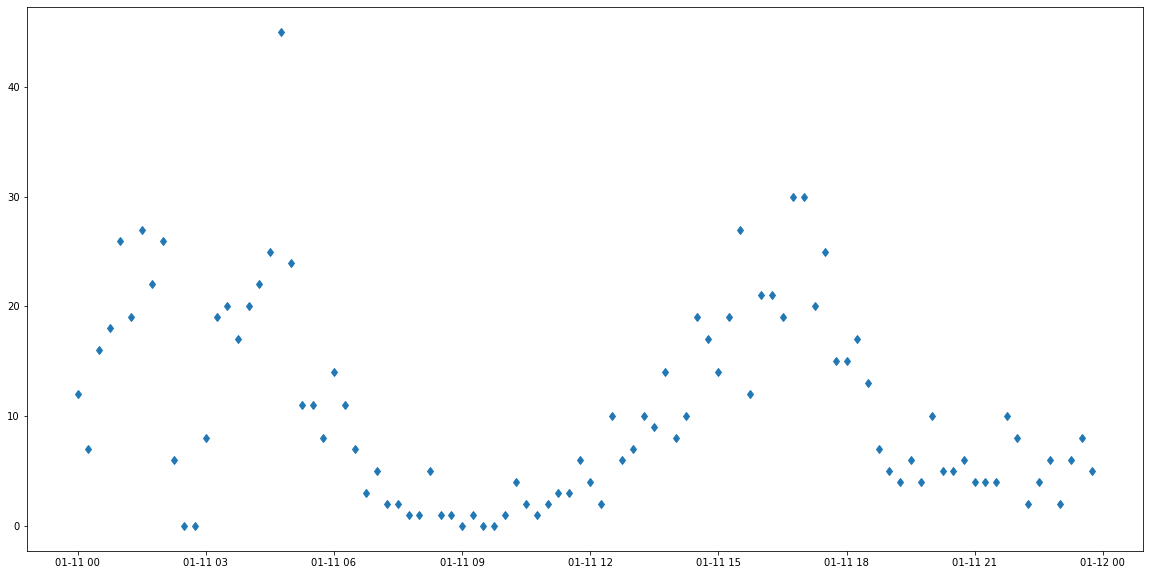

In [58]:
plt.figure(figsize=(20,10))
plt.plot(weekend.event, linestyle='', marker='d')

In [56]:
uni  = weekends.login_time.dt.date.unique().tolist()
uni

[datetime.date(1970, 1, 3),
 datetime.date(1970, 1, 4),
 datetime.date(1970, 1, 10),
 datetime.date(1970, 1, 11),
 datetime.date(1970, 1, 17),
 datetime.date(1970, 1, 18),
 datetime.date(1970, 1, 24),
 datetime.date(1970, 1, 25),
 datetime.date(1970, 1, 31),
 datetime.date(1970, 2, 1),
 datetime.date(1970, 2, 7),
 datetime.date(1970, 2, 8),
 datetime.date(1970, 2, 14),
 datetime.date(1970, 2, 15),
 datetime.date(1970, 2, 21),
 datetime.date(1970, 2, 22),
 datetime.date(1970, 2, 28),
 datetime.date(1970, 3, 1),
 datetime.date(1970, 3, 7),
 datetime.date(1970, 3, 8),
 datetime.date(1970, 3, 14),
 datetime.date(1970, 3, 15),
 datetime.date(1970, 3, 21),
 datetime.date(1970, 3, 22),
 datetime.date(1970, 3, 28),
 datetime.date(1970, 3, 29),
 datetime.date(1970, 4, 4),
 datetime.date(1970, 4, 5),
 datetime.date(1970, 4, 11),
 datetime.date(1970, 4, 12)]

In [122]:
weekday_aggregate = weekdays_grouped.reset_index()
weekend_aggregate = weekends_grouped.reset_index()
#timestamp = weekday_aggregate.login_time[].time()

In [123]:
weekday_aggregate['timestamp'] = weekday_aggregate.login_time.apply(lambda login: login.time())
weekday_aggregate['hour']      = weekday_aggregate.timestamp.apply(lambda x: x.hour)
weekday_aggregate['minute']    = weekday_aggregate.timestamp.apply(lambda x: x.minute)

weekend_aggregate['timestamp'] = weekend_aggregate.login_time.apply(lambda login: login.time())
weekend_aggregate['hour']      = weekend_aggregate.timestamp.apply(lambda x: x.hour)
weekend_aggregate['minute']    = weekend_aggregate.timestamp.apply(lambda x: x.minute)

In [124]:
weekday_aggregate

login_time  event  weekday timestamp  hour  minute
0    1970-01-01 20:00:00      2        8  20:00:00    20       0
1    1970-01-01 20:15:00      6       24  20:15:00    20      15
2    1970-01-01 20:30:00      9       36  20:30:00    20      30
3    1970-01-01 20:45:00      7       28  20:45:00    20      45
4    1970-01-01 21:00:00      1        4  21:00:00    21       0
...                  ...    ...      ...       ...   ...     ...
9783 1970-04-13 17:45:00      5        5  17:45:00    17      45
9784 1970-04-13 18:00:00      5        5  18:00:00    18       0
9785 1970-04-13 18:15:00      2        2  18:15:00    18      15
9786 1970-04-13 18:30:00      7        7  18:30:00    18      30
9787 1970-04-13 18:45:00      6        6  18:45:00    18      45

[9788 rows x 6 columns]

In [125]:
weekday_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  9788 non-null   datetime64[ns]
 1   event       9788 non-null   int64         
 2   weekday     9788 non-null   int64         
 3   timestamp   9788 non-null   object        
 4   hour        9788 non-null   int64         
 5   minute      9788 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 458.9+ KB


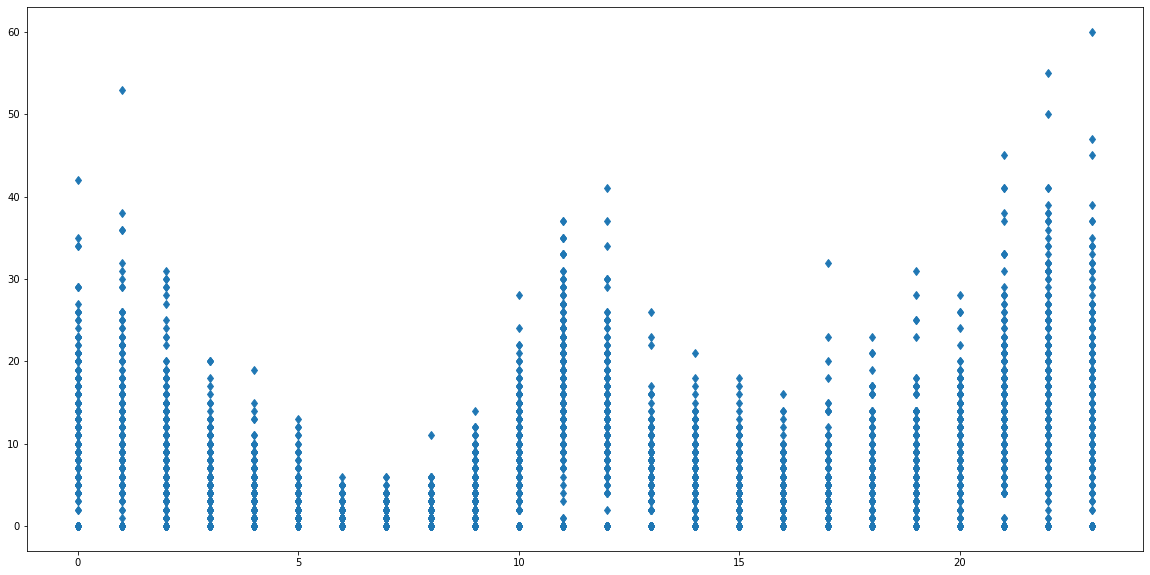

In [126]:
plt.figure(figsize=(20,10))
plt.plot(weekday_aggregate.hour, weekday_aggregate.event, linestyle='', marker='d')

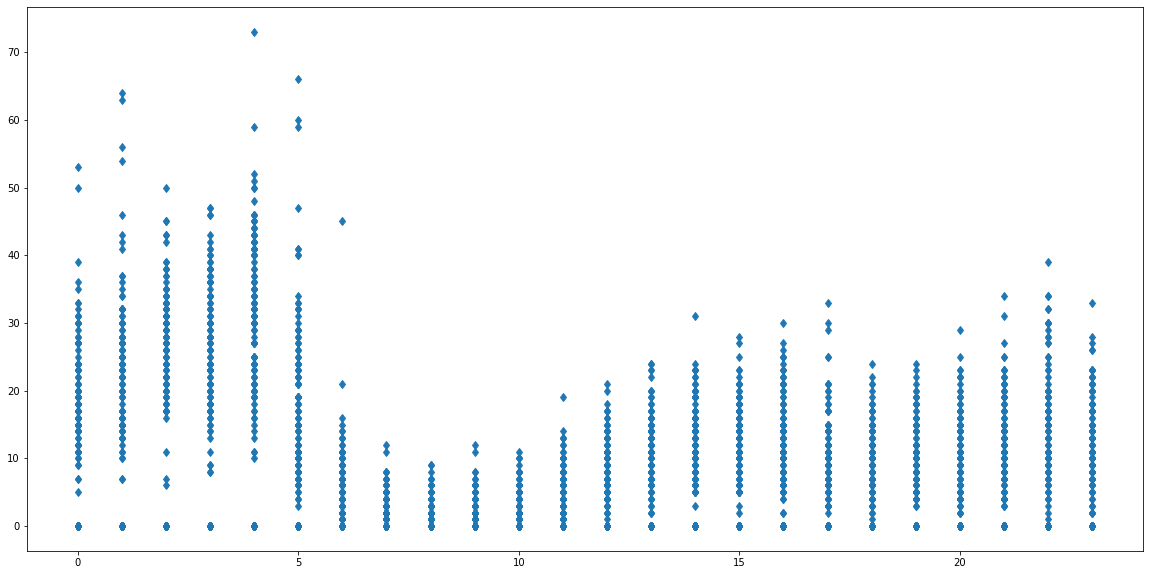

In [127]:
plt.figure(figsize=(20,10))
plt.plot(weekend_aggregate.hour, weekend_aggregate.event, linestyle='', marker='d')